<a href="https://colab.research.google.com/github/janhavi-giri/Heart_Failure_Analysis/blob/main/heart_failure_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [180]:
#mapping drive and obtaining the data
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/ML_Projects/')
pwd = os.getcwd()
print(pwd)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/ML_Projects


In [181]:
#import all the libraries
from scipy.io import loadmat,whosmat
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from numpy import reshape
import seaborn as sns
import sklearn
from sklearn.neighbors import NearestNeighbors
from sklearn import ensemble, cluster
from itertools import product
from sklearn.utils.validation import check_is_fitted


# Data pre-processing and visualization

In [182]:
# Read the data from csv file
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
print("# of features in dataset are =", df.shape[1])
print("# of samples in dataset are =", df.shape[0])
#List name of features
print("Features of data set are =", df.columns)
#List datatypes of features
print("Feature datatypes are=",df.dtypes)

# of features in dataset are = 13
# of samples in dataset are = 299
Features of data set are = Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')
Feature datatypes are= age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object


In [108]:
#Print first few rows of the input dataset
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [109]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [110]:
# Investigate the data set for any null values
for col in df.columns.to_list():
    print("Column", col, "Null value count=", df[col].isnull().sum())
    if(df[col].isnull().sum()!=0):
        print("Column has null count=",col, df[col].isnull().sum(), "and their datatype is",df[col].dtypes )

Column age Null value count= 0
Column anaemia Null value count= 0
Column creatinine_phosphokinase Null value count= 0
Column diabetes Null value count= 0
Column ejection_fraction Null value count= 0
Column high_blood_pressure Null value count= 0
Column platelets Null value count= 0
Column serum_creatinine Null value count= 0
Column serum_sodium Null value count= 0
Column sex Null value count= 0
Column smoking Null value count= 0
Column time Null value count= 0
Column DEATH_EVENT Null value count= 0


In [111]:
#splitting data: 80/20 split
from sklearn.model_selection import train_test_split
df_filt = df.drop(columns=['time'])
train, test = train_test_split(df_filt, test_size=0.2, random_state=25)

print(f"No. of training examples: {train.shape[0]}")
print(f"No. of testing examples: {test.shape[0]}")

No. of training examples: 239
No. of testing examples: 60


In [112]:
train_columns = train.columns.to_list()
test_columns = test.columns.to_list()
print("train columns=",train_columns,"test_columns=",test_columns)

train columns= ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'DEATH_EVENT'] test_columns= ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'DEATH_EVENT']


In [113]:
# scaling each column of the input features to mean zero and unit variance
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
print(train_scaled.shape)
print(train_scaled[0:2,0])
test_scaled = scaler.fit_transform(test)
print(test_scaled.shape)
print(test_scaled[0:2,0])



(239, 12)
[0.76363636 0.54545455]
(60, 12)
[0.54 0.58]


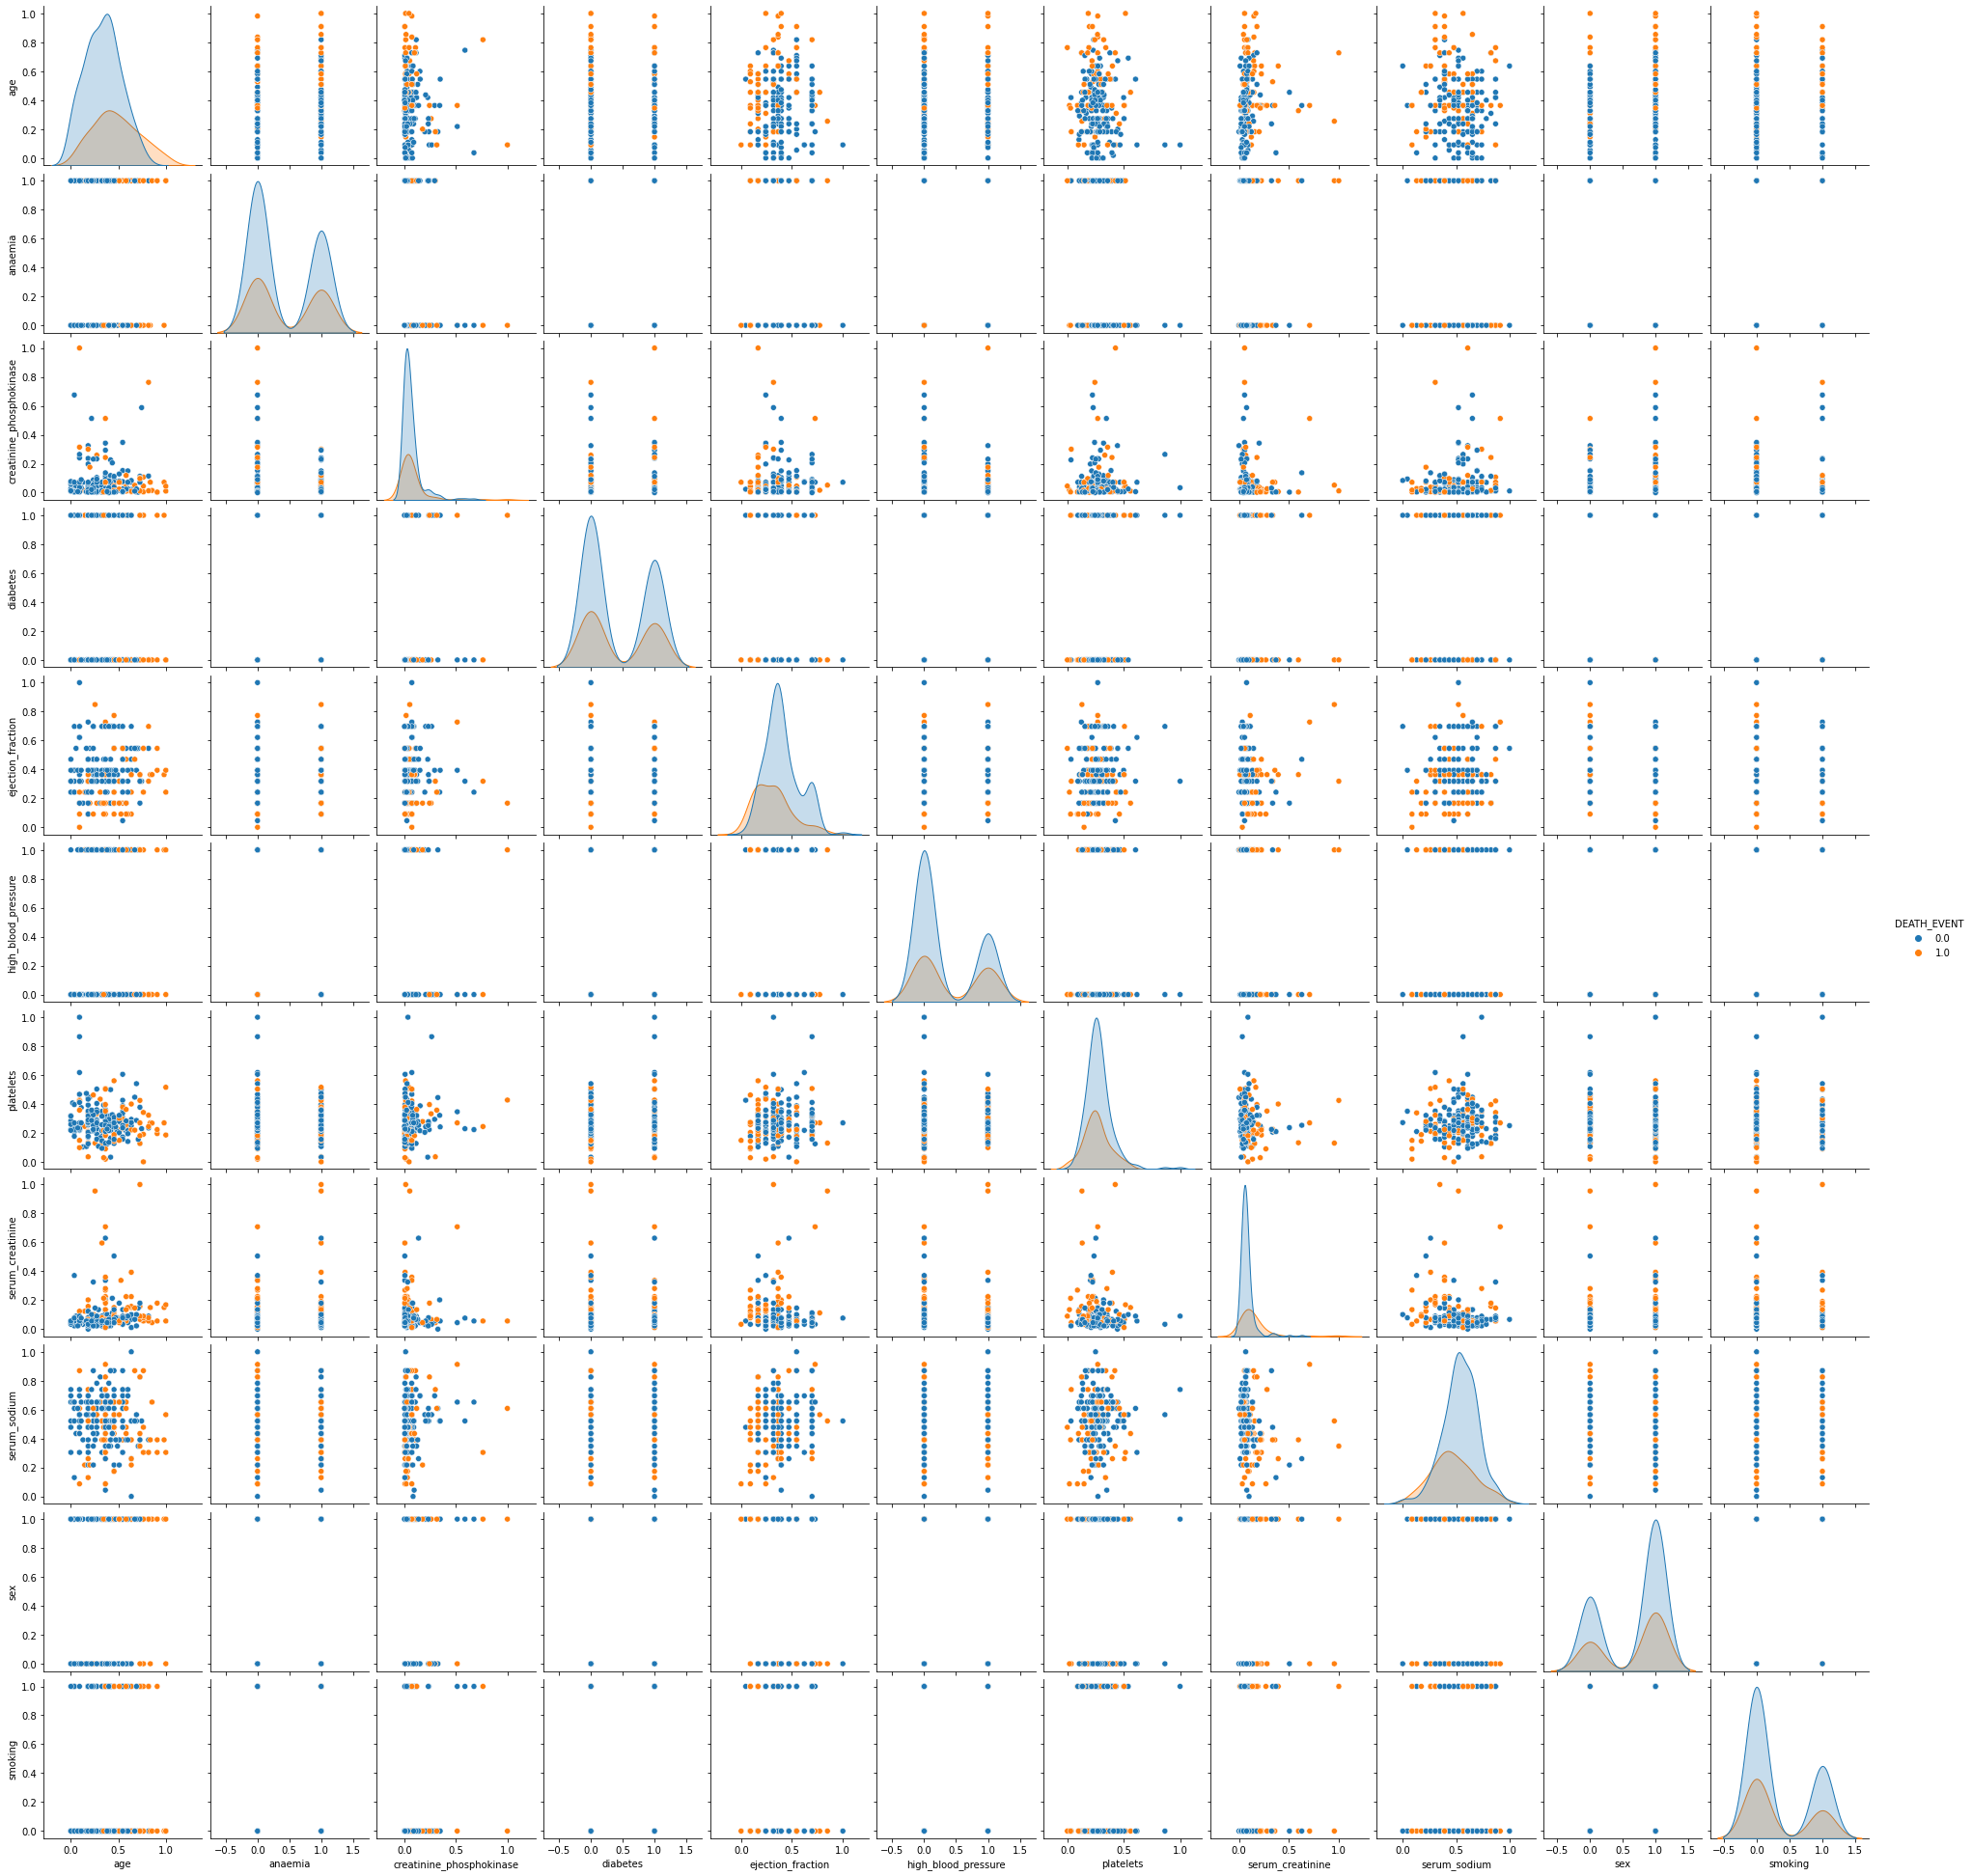

In [114]:
# Data visualization:
#Distribution of features in training dataset and how they are correlated among themselves
train_df_scaled = pd.DataFrame(train_scaled, columns=train_columns)
sns.pairplot(train_df_scaled,hue='DEATH_EVENT')

In [115]:
test_df_scaled = pd.DataFrame(test_scaled, columns=test_columns)

In [116]:
# input variables assigned and converted to numpy array(last column is the target therefore not picked)

X_train = (train_df_scaled.iloc[:,:-1].values)
print(X_train.shape)
X_test = (test_df_scaled.iloc[:,:-1].values)
print(X_test.shape)

(239, 11)
(60, 11)


In [117]:
# target variable assigned and converted to numpy array
Y_train = (train_df_scaled.iloc[:,-1].values).reshape((-1,1))
print("Shape of target in train dataset =", Y_train.shape)
Y_test = (test_df_scaled.iloc[:,-1].values).reshape((-1,1))
print("Shape of target in test dataset =", Y_test.shape)



Shape of target in train dataset = (239, 1)
Shape of target in test dataset = (60, 1)


In [118]:
# Inspect how balanced 'Y' is in the training
# computing fraction of positive values in target and test data
fraction_train = np.mean(Y_train)
fraction_test = np.mean(Y_test)
print("Percentage of positive values in training dataset target=", fraction_train*100.0)
print("Percentage of positive values in test dataset target=", fraction_test*100.0)

Percentage of positive values in training dataset target= 31.380753138075313
Percentage of positive values in test dataset target= 35.0


In [119]:
# It is an unbalanced dataset since the fraction of positive values << negative values => less likelihood of death

In [120]:
#checking if data is normalized

print(X_train.shape)
print(X_train[0:2,0])


print(X_test.shape)
print(X_test[0:2,0])


(239, 11)
[0.76363636 0.54545455]
(60, 11)
[0.54 0.58]


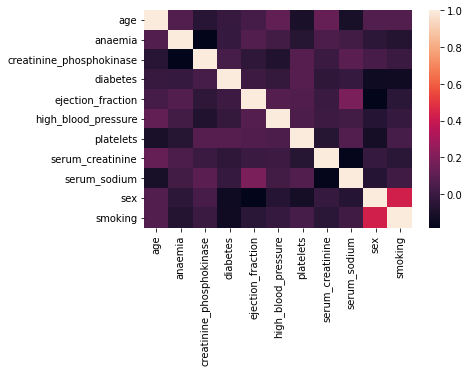

In [121]:
#not excluding time from analysis as the previous published result did
train_df_scaled_mod = train_df_scaled.drop(columns=['DEATH_EVENT'],axis=1)
test_df_scaled_mod = test_df_scaled.drop(columns=['DEATH_EVENT'],axis=1)
X_train_corr = train_df_scaled_mod.corr()
sns.heatmap(X_train_corr)
plt.show()

In [122]:
#Lets examine them and drop feature columns which have a high absolute Pearson Correlation i.e. >=0.6
keep_columns = np.full((X_train_corr.shape[0],), True, dtype=bool)
all_columns = train_df_scaled_mod.columns.to_list()
# Loop over all columns
for i in range(X_train_corr.shape[0]-1):
    # Loop over all columns to the right of the current one
    for j in range(i+1, X_train_corr.shape[0]-1):
        # If the absolute correlation between the current two columns is greater than or equal to 0.8, or no correlation 0 value...
        if (np.abs(X_train_corr.iloc[i,j]) >= 0.6):
            # If we haven't already told the keep_columns list to drop column j...
            if keep_columns[j]:
                # Drop column j
                keep_columns[j] = False
                print("Column to be dropped is =", all_columns[j], "correlated with column=", all_columns[i])
# Extract the columns to keep from the training df
selected_columns = train_df_scaled_mod.columns[keep_columns]
# Make a new df with the columns we've decided to keep from the training df
train_df_corr_filt = train_df_scaled_mod[selected_columns]

print('The following columns are present in the new data:')
print(selected_columns)
print(f'The old data had {train_df_scaled_mod.shape[1]} features. The new df has {train_df_corr_filt.shape[1]} features.')
train_df_corr_filt.head()

The following columns are present in the new data:
Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking'],
      dtype='object')
The old data had 11 features. The new df has 11 features.


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,0.763636,1.0,0.107534,1.0,0.545455,1.0,0.341220,0.056180,0.869565,0.0,0.0
1,0.545455,0.0,0.023723,1.0,0.045455,1.0,0.425903,0.056180,0.478261,1.0,1.0
2,0.454545,0.0,0.025287,1.0,0.545455,0.0,0.127024,0.089888,0.521739,1.0,1.0
3,0.000000,0.0,0.027894,0.0,0.469697,1.0,0.283935,0.044944,0.652174,0.0,0.0
4,0.454545,1.0,0.035845,0.0,0.166667,0.0,0.312578,0.067416,0.695652,1.0,0.0


# No strong correlation found among the given features

# Feature Selection using Random Forest Classifier

Feature ranking:
1. feature 7 (0.174806)
2. feature 0 (0.156311)
3. feature 4 (0.148431)
4. feature 8 (0.129224)
5. feature 6 (0.103435)
6. feature 2 (0.095514)
7. feature 3 (0.045915)
8. feature 9 (0.039339)
9. feature 10 (0.037470)
10. feature 5 (0.035136)
11. feature 1 (0.034417)


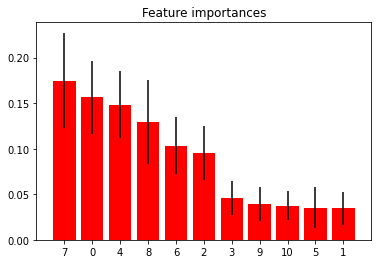

In [123]:
#Use Random Forest to get feature ranks/importances for each feature
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a forest and compute the impurity-based feature importances
forest = ExtraTreesClassifier(n_estimators=20,
                              random_state=0)

forest.fit(X_train, np.ravel(Y_train))
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [124]:
print(f"Top 3 features ranked are {selected_columns[7]} with feature ranking {importances[7]}, {selected_columns[0]} with feature ranking {importances[0]}, and {selected_columns[4]} with feature ranking {importances[4]} ")
print(f"The lowest ranked feature is {selected_columns[1]} with feature ranking {importances[1]} ")

Top 3 features ranked are serum_creatinine with feature ranking 0.1748063573066016, age with feature ranking 0.15631141558586975, and ejection_fraction with feature ranking 0.14843072983707165 
The lowest ranked feature is anaemia with feature ranking 0.03441747466016304 


# Top 3 features ranked are serum_creatinine, age, and ejection_fraction. Thus, in order to determine whether there will be heart failure or not in a patient, these are the three most important features of the patient which need to be considered.

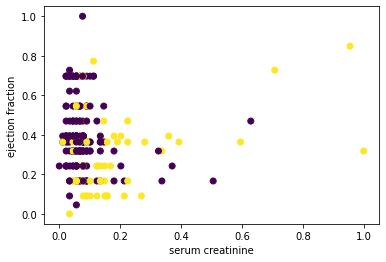

In [125]:
plt.scatter(X_train[:,7], X_train[:,4],c=Y_train[:])

plt.xlabel("serum creatinine")
plt.ylabel("ejection fraction")
plt.show()

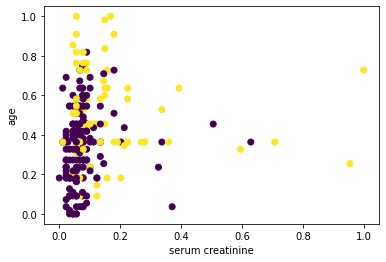

In [126]:
plt.scatter(X_train[:,7], X_train[:,0],c=Y_train[:])

plt.xlabel("serum creatinine")
plt.ylabel("age")
plt.show()

In [127]:
important_features = ['age','serum_creatinine','ejection_fraction']
print(train_df_scaled_mod.loc[:,important_features])

          age  serum_creatinine  ejection_fraction
0    0.763636          0.056180           0.545455
1    0.545455          0.056180           0.045455
2    0.454545          0.089888           0.545455
3    0.000000          0.044944           0.469697
4    0.454545          0.067416           0.166667
..        ...               ...                ...
234  0.545455          0.078652           0.318182
235  0.400000          0.044944           0.696970
236  0.218182          0.056180           0.242424
237  0.381818          0.044944           0.393939
238  0.109091          0.076404           0.393939

[239 rows x 3 columns]


In [128]:
X_train_scaled_mod = train_df_scaled_mod.loc[:,important_features].values
print(X_train_scaled_mod.shape)
X_test_scaled_mod = test_df_scaled_mod.loc[:,important_features].values
print(X_test_scaled_mod.shape)

(239, 3)
(60, 3)


#Logistic Regression Classifier

In [129]:
# Importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as accuracy
from sklearn.metrics import recall_score as recall
from sklearn.metrics import precision_score as precision
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics

In [130]:
#Hyperparameter tuning for Logistic Regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
pipe = Pipeline([('classifier', LogisticRegression())])
param_grid = {'classifier' : [LogisticRegression(random_state=42, class_weight='balanced')],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']}
# creating grid search object
clf = GridSearchCV(pipe, param_grid = param_grid, cv=5, verbose=True, n_jobs=-1)
#fit on data
best_clf_fit = clf.fit(X_train_scaled_mod,np.ravel(Y_train))
best_clf_predict = best_clf_fit.predict(X_test_scaled_mod)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.3s finished


In [131]:
best_clf_fit.best_params_['classifier']

LogisticRegression(C=4.281332398719396, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [132]:
from sklearn import metrics
print('Model accuracy is',best_clf_fit.score(X_test_scaled_mod, Y_test))

Model accuracy is 0.7166666666666667


Accuracy = 0.7166666666666667, Precision = 0.5769230769230769, Recall = 0.7142857142857143, F1-score = 0.6382978723404256
Confusion Matrix is:
[[28 11]
 [ 6 15]]


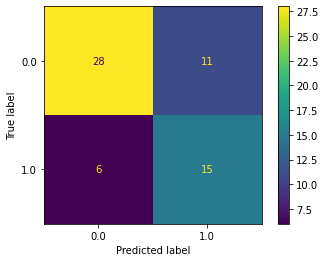

In [133]:
#Evaluate predictions
cmlog = confusion_matrix(Y_test, best_clf_predict)
acc   = accuracy(Y_test, best_clf_predict)
rec   = recall(Y_test, best_clf_predict)
prec  = precision(Y_test, best_clf_predict)
f1    = f1_score(Y_test, best_clf_predict)
# Print the metrics, display the confusion matrix
print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')
print('Confusion Matrix is:')
print(cmlog)
plot_confusion_matrix(best_clf_fit,X_test_scaled_mod,Y_test)
plt.show()

In [134]:
print(metrics.classification_report(Y_test,best_clf_predict))

              precision    recall  f1-score   support

         0.0       0.82      0.72      0.77        39
         1.0       0.58      0.71      0.64        21

    accuracy                           0.72        60
   macro avg       0.70      0.72      0.70        60
weighted avg       0.74      0.72      0.72        60



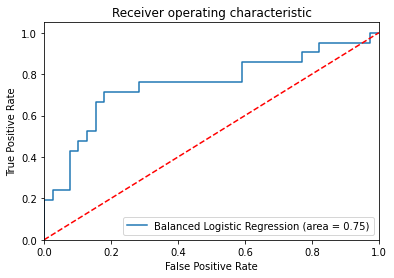

In [135]:
probs = best_clf_fit.predict_proba(X_test_scaled_mod)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc_hyp_fit = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='Balanced Logistic Regression (area = %0.2f)' % roc_auc_hyp_fit)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [136]:
print('With hyperparameter tuning the roc_auc=',roc_auc_hyp_fit)

With hyperparameter tuning the roc_auc= 0.7509157509157509


In [137]:
print("With hyperparameter tuning the model accuracy is:", best_clf_fit.score(X_test_scaled_mod,Y_test))

With hyperparameter tuning the model accuracy is: 0.7166666666666667


In [138]:
data = {
    'accuracy': [accuracy(Y_test, best_clf_predict)],
    'precision': [precision(Y_test, best_clf_predict)],
    'recall': [recall(Y_test,best_clf_predict)],
    'f1 score': [f1_score(Y_test, best_clf_predict)]
}
print("Logistic Regression Results")
pd.DataFrame.from_dict(data, orient='index', columns=[' LR_ tuned'])

Logistic Regression Results


,LR_ tuned
accuracy,0.716667
precision,0.576923
recall,0.714286
f1 score,0.638298


# Random Forest Classifier

In [139]:
from sklearn.ensemble import RandomForestClassifier


In [140]:
#Hyperparameter tuning for Random Forest Classifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
pipe = Pipeline([('classifier', RandomForestClassifier())])
param_grid = {'classifier' : [RandomForestClassifier(random_state=42, class_weight='balanced')],
    'classifier__criterion' : ["gini","entropy"],
     'classifier__max_depth' : [2,5,10]
    }
# creating grid search object
clf = GridSearchCV(pipe, param_grid = param_grid, cv=5, verbose=True, n_jobs=-1)
#fit on data
best_clf_fit = clf.fit(X_train_scaled_mod,np.ravel(Y_train))
best_clf_predict = best_clf_fit.predict(X_test_scaled_mod)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.8s finished


In [141]:
best_clf_fit.best_params_['classifier']

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Accuracy = 0.65, Precision = 0.5, Recall = 0.7619047619047619, F1-score = 0.6037735849056604
Confusion Matrix is:
[[23 16]
 [ 5 16]]


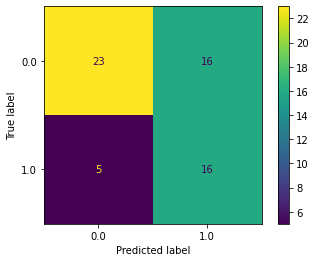

In [142]:
#Evaluate predictions
cmlog = confusion_matrix(Y_test, best_clf_predict)
acc   = accuracy(Y_test, best_clf_predict)
rec   = recall(Y_test, best_clf_predict)
prec  = precision(Y_test, best_clf_predict)
f1    = f1_score(Y_test, best_clf_predict)
# Print the metrics, display the confusion matrix
print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')
print('Confusion Matrix is:')
print(cmlog)
plot_confusion_matrix(best_clf_fit,X_test_scaled_mod,Y_test)
plt.show()

In [143]:
print(metrics.classification_report(Y_test,best_clf_predict))

              precision    recall  f1-score   support

         0.0       0.82      0.59      0.69        39
         1.0       0.50      0.76      0.60        21

    accuracy                           0.65        60
   macro avg       0.66      0.68      0.65        60
weighted avg       0.71      0.65      0.66        60



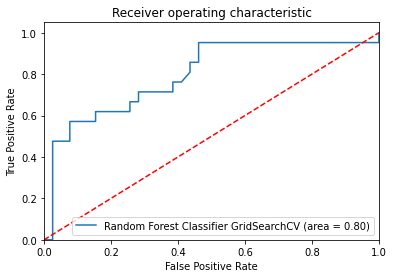

In [144]:
# ROC/AUC for positive class
probs = best_clf_fit.predict_proba(X_test_scaled_mod)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc_hyp_fit = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classifier GridSearchCV (area = %0.2f)' % roc_auc_hyp_fit)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Linear SVM

In [145]:
from sklearn.svm import LinearSVC
pipe_svc = Pipeline([('classifier', LinearSVC())])
param_grid_svc = {'classifier': [LinearSVC(class_weight='balanced',random_state=42)],'classifier__tol':[1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5],'classifier__C':[1,10,100,1000]}
# creating grid search object
svc_clf = GridSearchCV(pipe_svc, param_grid = param_grid_svc, cv=5, verbose=True, n_jobs=-1)
#fit on data
best_svc_clf_fit = svc_clf.fit(X_train_scaled_mod,np.ravel(Y_train))
best_svc_clf_predict = best_svc_clf_fit.predict(X_test_scaled_mod)
print(best_svc_clf_fit.best_estimator_.get_params()['classifier'])
print("For  Linear SVM:\n")
print(metrics.classification_report(Y_test,best_svc_clf_predict))

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


LinearSVC(C=100, class_weight='balanced', dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0)
For  Linear SVM:

              precision    recall  f1-score   support

         0.0       0.82      0.72      0.77        39
         1.0       0.58      0.71      0.64        21

    accuracy                           0.72        60
   macro avg       0.70      0.72      0.70        60
weighted avg       0.74      0.72      0.72        60



[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.7s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



For Linear SVM Classifier:

Accuracy = 0.7166666666666667, Precision = 0.5769230769230769, Recall = 0.7142857142857143, F1-score = 0.6382978723404256
Confusion Matrix is:
[[28 11]
 [ 6 15]]
Confusion matrix Plot
[[28 11]
 [ 6 15]]


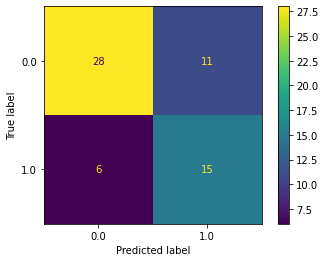

In [146]:
#Evaluate predictions
cmlog = confusion_matrix(Y_test, best_svc_clf_predict)
acc   = accuracy(Y_test, best_svc_clf_predict)
rec   = recall(Y_test, best_svc_clf_predict)
prec  = precision(Y_test, best_svc_clf_predict)
f1    = f1_score(Y_test, best_svc_clf_predict)
# Print the metrics, display the confusion matrix
print()
print("For Linear SVM Classifier:\n")
print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')
print('Confusion Matrix is:')
print(cmlog)
print("Confusion matrix Plot")
disp = plot_confusion_matrix(best_svc_clf_fit,X_test_scaled_mod,Y_test)
print(disp.confusion_matrix)

With Poly SVC the roc_auc= 0.7161172161172161


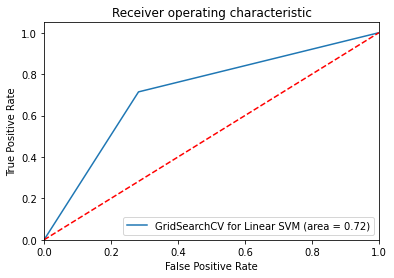

In [147]:
# ROC/AUC for positive class
fpr, tpr, threshold = metrics.roc_curve(Y_test, best_svc_clf_predict)
roc_auc_hyp_rbf_fit = metrics.auc(fpr, tpr)
print('With Poly SVC the roc_auc=',roc_auc_hyp_rbf_fit)
plt.figure()
plt.plot(fpr, tpr, label='GridSearchCV for Linear SVM (area = %0.2f)' % roc_auc_hyp_rbf_fit)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC with Linear SVM ')
plt.show()

# Nonlinear SVM: RBF Kernel

In [148]:
from sklearn.svm import SVC

pipe_svc = Pipeline([('classifier', SVC())])
param_grid_svc = {'classifier': [SVC(kernel='rbf',class_weight='balanced',random_state=42, probability=True)],'classifier__gamma':[1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5],'classifier__C':[1,10,100,1000]}
# creating grid search object
svc_clf = GridSearchCV(pipe_svc, param_grid = param_grid_svc, cv=5, verbose=True, n_jobs=-1)
#fit on data
best_svc_clf_fit = svc_clf.fit(X_train_scaled_mod,np.ravel(Y_train))
best_svc_clf_predict = best_svc_clf_fit.predict(X_test_scaled_mod)
print(best_svc_clf_fit.best_estimator_.get_params()['classifier'])
print("For Nonlinear SVM Classifier with RBF Kernel:\n")
print(metrics.classification_report(Y_test,best_svc_clf_predict))

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


SVC(C=100, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.2, kernel='rbf',
    max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
    verbose=False)
For Nonlinear SVM Classifier with RBF Kernel:

              precision    recall  f1-score   support

         0.0       0.89      0.62      0.73        39
         1.0       0.55      0.86      0.67        21

    accuracy                           0.70        60
   macro avg       0.72      0.74      0.70        60
weighted avg       0.77      0.70      0.71        60



[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.1s finished



For Nonlinear SVM Classifier with RBF Kernel:

Accuracy = 0.7, Precision = 0.5454545454545454, Recall = 0.8571428571428571, F1-score = 0.6666666666666665
Confusion Matrix is:
[[24 15]
 [ 3 18]]
Confusion matrix Plot
[[24 15]
 [ 3 18]]


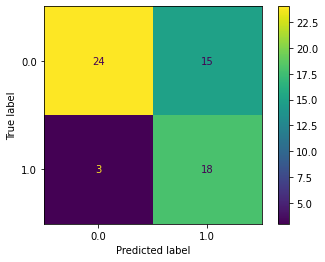

In [149]:
#Evaluate predictions
cmlog = confusion_matrix(Y_test, best_svc_clf_predict)
acc   = accuracy(Y_test, best_svc_clf_predict)
rec   = recall(Y_test, best_svc_clf_predict)
prec  = precision(Y_test, best_svc_clf_predict)
f1    = f1_score(Y_test, best_svc_clf_predict)
# Print the metrics, display the confusion matrix
print()
print("For Nonlinear SVM Classifier with RBF Kernel:\n")
print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')
print('Confusion Matrix is:')
print(cmlog)
print("Confusion matrix Plot")
disp = plot_confusion_matrix(best_svc_clf_fit,X_test_scaled_mod,Y_test)
print(disp.confusion_matrix)

With RBF SVC the roc_auc= 0.7753357753357755


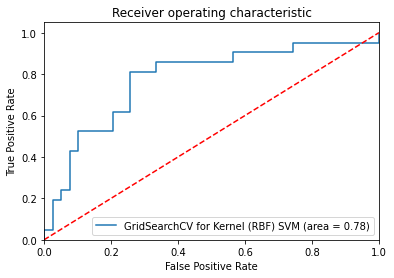

In [150]:
# ROC/AUC for positive class
probs_svc_rbf = best_svc_clf_fit.predict_proba(X_test_scaled_mod)
preds_svc_rbf = probs_svc_rbf[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds_svc_rbf)
roc_auc_hyp_rbf_fit = metrics.auc(fpr, tpr)
print('With RBF SVC the roc_auc=',roc_auc_hyp_rbf_fit)
plt.figure()
plt.plot(fpr, tpr, label='GridSearchCV for Kernel (RBF) SVM (area = %0.2f)' % roc_auc_hyp_rbf_fit)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC with Kernel (RBF) SVM ')
plt.show()

#KNN Classifier

In [151]:
 from sklearn.neighbors import KNeighborsClassifier
 grid_params = {'n_neighbors': [3,5,11,19],
                'weights': ['uniform', 'distance'],
                'metric': ['euclidean','manhattan']
 }
 gs =GridSearchCV(KNeighborsClassifier(),grid_params,verbose=1,cv=3,n_jobs=-1)
 gs_results = gs.fit(X_train_scaled_mod,Y_train)


Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    0.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [152]:
gs_results.best_params_

{'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}

In [153]:
neigh = KNeighborsClassifier(n_neighbors=11,metric='euclidean',weights='distance')
neigh_fit = neigh.fit(X_train_scaled_mod,np.ravel(Y_train))
neigh_predict = neigh_fit.predict(X_test_scaled_mod)

Accuracy = 0.7333333333333333, Precision = 0.631578947368421, Recall = 0.5714285714285714, F1-score = 0.6
Confusion Matrix is:
[[32  7]
 [ 9 12]]


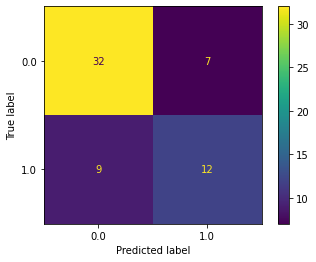

In [154]:
#Evaluate predictions
cmlog = confusion_matrix(Y_test, neigh_predict)
acc   = accuracy(Y_test, neigh_predict)
rec   = recall(Y_test, neigh_predict)
prec  = precision(Y_test, neigh_predict)
f1    = f1_score(Y_test, neigh_predict)
# Print the metrics, display the confusion matrix
print(f'Accuracy = {acc}, Precision = {prec}, Recall = {rec}, F1-score = {f1}')
print('Confusion Matrix is:')
print(cmlog)
plot_confusion_matrix(neigh_fit,X_test_scaled_mod,Y_test)
plt.show()

In [155]:
print(metrics.classification_report(Y_test,neigh_predict))

              precision    recall  f1-score   support

         0.0       0.78      0.82      0.80        39
         1.0       0.63      0.57      0.60        21

    accuracy                           0.73        60
   macro avg       0.71      0.70      0.70        60
weighted avg       0.73      0.73      0.73        60



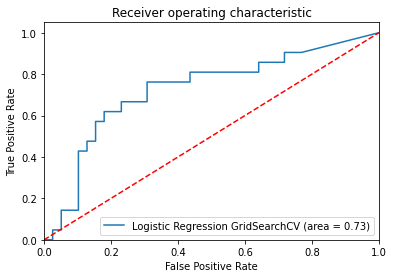

In [156]:
# ROC/AUC for positive class
probs = neigh_fit.predict_proba(X_test_scaled_mod)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc_neigh_fit = metrics.auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression GridSearchCV (area = %0.2f)' % roc_auc_neigh_fit)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC with K-Nearest Neighbors')
plt.show()

# Implementation of various linear and non-linear classifiers predicting presence or absence of heart failure

# Additional metrics:
  sensitivity  = TP / (TP+FN)
  
  specificity  = TN / (TN+FP)
    


In [158]:
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

# create a pipeline of classifiers
classifiers = [LogisticRegression(C=4.281332398719396, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False),
               RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False),
               LinearSVC(C=100, class_weight='balanced', dual=True, fit_intercept=True,
                      intercept_scaling=1, loss='squared_hinge', max_iter=1000,
                      multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
                      verbose=0),
                SVC(C=100, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
               decision_function_shape='ovr', degree=3, gamma=0.2, kernel='rbf',
              max_iter=-1, probability=True, random_state=42, shrinking=True, tol=0.001,
            verbose=False),
            KNeighborsClassifier(n_neighbors=11,metric='euclidean',weights='distance'),
            GaussianNB(),
            MLPClassifier(hidden_layer_sizes=(100, 100, 100),alpha=0.1, learning_rate_init=0.1,
                             max_iter=10000, activation='relu'),
            MLPClassifier(hidden_layer_sizes=(100, 100, 100),
                             max_iter=10000, activation='tanh')
                ]
clf_names = ["Logistic Regression",
             "RandomForestClassifier",
             "Linear SVC",
             "Nonlinear SVC",
             "Nearest Neighbors (k=11)",
             "Gaussian Naive Bayes",
             "MLP (RelU)",
             "MLP (tanh)"]

fitting classifier Logistic Regression
predicting labels for classifier Logistic Regression


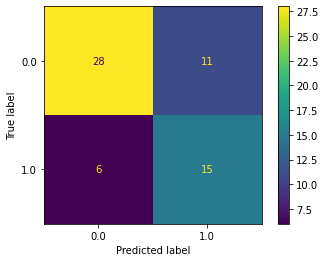

Classification report for Logistic Regression classifier:
               precision    recall  f1-score   support

         0.0       0.82      0.72      0.77        39
         1.0       0.58      0.71      0.64        21

    accuracy                           0.72        60
   macro avg       0.70      0.72      0.70        60
weighted avg       0.74      0.72      0.72        60

confusion matrix [[28 11]
 [ 6 15]]
[0.71794872 0.71428571]
TP=[28 15], TN=[15 28], FP=[ 6 11], FN=[11  6]
fitting classifier RandomForestClassifier
predicting labels for classifier RandomForestClassifier


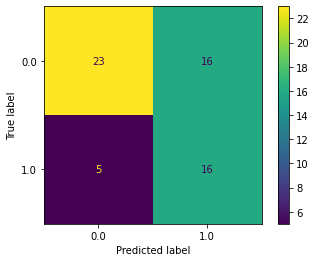

Classification report for RandomForestClassifier classifier:
               precision    recall  f1-score   support

         0.0       0.82      0.59      0.69        39
         1.0       0.50      0.76      0.60        21

    accuracy                           0.65        60
   macro avg       0.66      0.68      0.65        60
weighted avg       0.71      0.65      0.66        60

confusion matrix [[23 16]
 [ 5 16]]
[0.58974359 0.76190476]
TP=[23 16], TN=[16 23], FP=[ 5 16], FN=[16  5]
fitting classifier Linear SVC
predicting labels for classifier Linear SVC


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


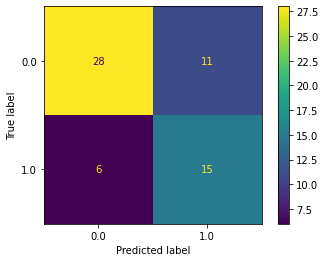

Classification report for Linear SVC classifier:
               precision    recall  f1-score   support

         0.0       0.82      0.72      0.77        39
         1.0       0.58      0.71      0.64        21

    accuracy                           0.72        60
   macro avg       0.70      0.72      0.70        60
weighted avg       0.74      0.72      0.72        60

confusion matrix [[28 11]
 [ 6 15]]
[0.71794872 0.71428571]
TP=[28 15], TN=[15 28], FP=[ 6 11], FN=[11  6]
fitting classifier Nonlinear SVC
predicting labels for classifier Nonlinear SVC


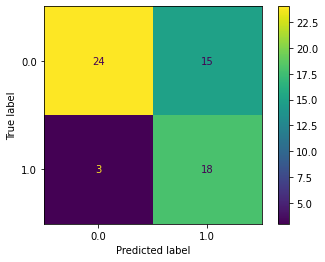

Classification report for Nonlinear SVC classifier:
               precision    recall  f1-score   support

         0.0       0.89      0.62      0.73        39
         1.0       0.55      0.86      0.67        21

    accuracy                           0.70        60
   macro avg       0.72      0.74      0.70        60
weighted avg       0.77      0.70      0.71        60

confusion matrix [[24 15]
 [ 3 18]]
[0.61538462 0.85714286]
TP=[24 18], TN=[18 24], FP=[ 3 15], FN=[15  3]
fitting classifier Nearest Neighbors (k=11)
predicting labels for classifier Nearest Neighbors (k=11)


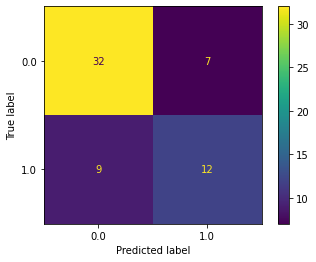

Classification report for Nearest Neighbors (k=11) classifier:
               precision    recall  f1-score   support

         0.0       0.78      0.82      0.80        39
         1.0       0.63      0.57      0.60        21

    accuracy                           0.73        60
   macro avg       0.71      0.70      0.70        60
weighted avg       0.73      0.73      0.73        60

confusion matrix [[32  7]
 [ 9 12]]
[0.82051282 0.57142857]
TP=[32 12], TN=[12 32], FP=[9 7], FN=[7 9]
fitting classifier Gaussian Naive Bayes
predicting labels for classifier Gaussian Naive Bayes


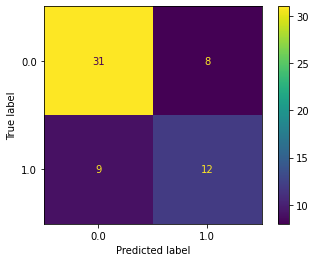

Classification report for Gaussian Naive Bayes classifier:
               precision    recall  f1-score   support

         0.0       0.78      0.79      0.78        39
         1.0       0.60      0.57      0.59        21

    accuracy                           0.72        60
   macro avg       0.69      0.68      0.69        60
weighted avg       0.71      0.72      0.72        60

confusion matrix [[31  8]
 [ 9 12]]
[0.79487179 0.57142857]
TP=[31 12], TN=[12 31], FP=[9 8], FN=[8 9]
fitting classifier MLP (RelU)
predicting labels for classifier MLP (RelU)


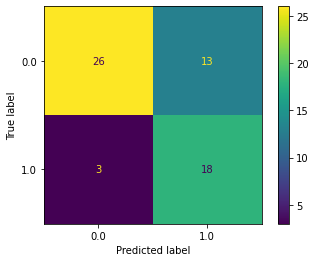

Classification report for MLP (RelU) classifier:
               precision    recall  f1-score   support

         0.0       0.90      0.67      0.76        39
         1.0       0.58      0.86      0.69        21

    accuracy                           0.73        60
   macro avg       0.74      0.76      0.73        60
weighted avg       0.79      0.73      0.74        60

confusion matrix [[26 13]
 [ 3 18]]
[0.66666667 0.85714286]
TP=[26 18], TN=[18 26], FP=[ 3 13], FN=[13  3]
fitting classifier MLP (tanh)
predicting labels for classifier MLP (tanh)


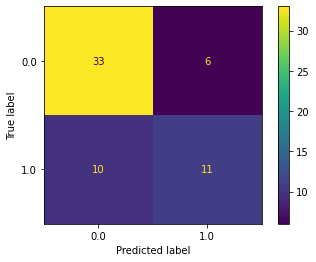

Classification report for MLP (tanh) classifier:
               precision    recall  f1-score   support

         0.0       0.77      0.85      0.80        39
         1.0       0.65      0.52      0.58        21

    accuracy                           0.73        60
   macro avg       0.71      0.68      0.69        60
weighted avg       0.73      0.73      0.73        60

confusion matrix [[33  6]
 [10 11]]
[0.84615385 0.52380952]
TP=[33 11], TN=[11 33], FP=[10  6], FN=[ 6 10]
dict_values([array([0.71794872, 0.71428571]), array([0.58974359, 0.76190476]), array([0.71794872, 0.71428571]), array([0.61538462, 0.85714286]), array([0.82051282, 0.57142857]), array([0.79487179, 0.57142857]), array([0.66666667, 0.85714286]), array([0.84615385, 0.52380952])])


In [159]:
from sklearn.metrics import precision_recall_fscore_support,matthews_corrcoef
scores_rec = dict()
scores_prec = dict()
scores_f1 = dict()
scores_mcc = dict()
final_accuracy = dict()
roc_auc_out = dict()
sens_out = dict()
spec_out = dict()
metrics_out = []
for name, clf in zip(clf_names, classifiers):
    print("fitting classifier", name)
    clf_fit = clf.fit(X_train_scaled_mod, np.ravel(Y_train))
    print("predicting labels for classifier", name)
    Y_pred = clf.predict(X_test_scaled_mod)
    scores_rec[name] = recall(
        Y_test, Y_pred)
    scores_prec[name] = precision(
        Y_test, Y_pred)
    scores_f1[name] = f1_score(Y_test,Y_pred)
    scores_mcc[name] = matthews_corrcoef(Y_test, Y_pred)
    final_accuracy[name] = accuracy(Y_test,Y_pred)
    if (name!='Linear SVC'):
      probs_clf= clf.predict_proba(X_test_scaled_mod)
      preds_clf = probs_clf[:,1]
      fpr, tpr, threshold = metrics.roc_curve(Y_test, preds_clf)
      roc_auc_fit = metrics.auc(fpr, tpr)
      roc_auc_out[name]=roc_auc_fit
    else:
      fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred)
      roc_auc_fit = metrics.auc(fpr, tpr)
      roc_auc_out[name]=roc_auc_fit
    plot_confusion_matrix(clf_fit,X_test_scaled_mod,Y_test)
    plt.show()
    print(f"Classification report for {name} classifier:\n", sklearn.metrics.classification_report(Y_test,Y_pred))
    cmlog= confusion_matrix(Y_test,Y_pred)
    print("confusion matrix",cmlog)
    FP = cmlog.sum(axis=0) - np.diag(cmlog)  
    FN = cmlog.sum(axis=1) - np.diag(cmlog)
    TP = np.diag(cmlog)
    TN = cmlog.sum() - (FP + FN + TP)
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    print(TPR)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # Negative predictive value
    NPV = TN/(TN+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # False discovery rate
    FDR = FP/(TP+FP)
     # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    sens_out[name] = TPR
    spec_out[name] = TNR
    print(f"TP={TP}, TN={TN}, FP={FP}, FN={FN}")
print(sens_out.values())
sens_out = pd.DataFrame(sens_out,index=['sensitivity for class 0', 'sensitivity for class 1'])
spec_out = pd.DataFrame(spec_out,index=['specificity for class 0','specificity for class 1'])

scores_rec = pd.DataFrame(scores_rec, index=['recall'])                              

scores_prec = pd.DataFrame(scores_prec, index=[
                               'precision'])
scores_f1 = pd.DataFrame(scores_f1,index=['f1_score'])
scores_df_0 = scores_rec.append(scores_prec).append(scores_f1).append(
    pd.Series(scores_mcc, name='MCC'))
scores_df = scores_df_0.append(pd.Series(final_accuracy, name='accuracy')).append(pd.Series(roc_auc_out,name='roc_auc')).append(sens_out).append(spec_out)


In [160]:
sens_out

,Logistic Regression,RandomForestClassifier,Linear SVC,Nonlinear SVC,Nearest Neighbors (k=11),Gaussian Naive Bayes,MLP (RelU),MLP (tanh)
sensitivity for class 0,0.717949,0.589744,0.717949,0.615385,0.820513,0.794872,0.666667,0.846154
sensitivity for class 1,0.714286,0.761905,0.714286,0.857143,0.571429,0.571429,0.857143,0.523810


In [161]:
spec_out

,Logistic Regression,RandomForestClassifier,Linear SVC,Nonlinear SVC,Nearest Neighbors (k=11),Gaussian Naive Bayes,MLP (RelU),MLP (tanh)
specificity for class 0,0.714286,0.761905,0.714286,0.857143,0.571429,0.571429,0.857143,0.523810
specificity for class 1,0.717949,0.589744,0.717949,0.615385,0.820513,0.794872,0.666667,0.846154


# Results

In [162]:
scores_df

,Logistic Regression,RandomForestClassifier,Linear SVC,Nonlinear SVC,Nearest Neighbors (k=11),Gaussian Naive Bayes,MLP (RelU),MLP (tanh)
recall,0.714286,0.761905,0.714286,0.857143,0.571429,0.571429,0.857143,0.523810
precision,0.576923,0.500000,0.576923,0.545455,0.631579,0.600000,0.580645,0.647059
f1_score,0.638298,0.603774,0.638298,0.666667,0.600000,0.585366,0.692308,0.578947
MCC,0.416040,0.336199,0.416040,0.453033,0.401878,0.370625,0.499960,0.391599
accuracy,0.716667,0.650000,0.716667,0.700000,0.733333,0.716667,0.733333,0.733333
roc_auc,0.750916,0.796703,0.716117,0.775336,0.725275,0.768010,0.791209,0.755800
sensitivity for class 0,0.717949,0.589744,0.717949,0.615385,0.820513,0.794872,0.666667,0.846154
sensitivity for class 1,0.714286,0.761905,0.714286,0.857143,0.571429,0.571429,0.857143,0.523810
specificity for class 0,0.714286,0.761905,0.714286,0.857143,0.571429,0.571429,0.857143,0.523810
specificity for class 1,0.717949,0.589744,0.717949,0.615385,0.820513,0.794872,0.666667,0.846154


# Various metrics are compared for the chosen classifer models. 

# PCA for dimensionality reduction

In [163]:
df_mod = df_filt.copy() 
df_mod_cols = df_mod.columns
print(df_mod.columns)
df_arr = df_mod.to_numpy()
print(df_arr.shape)
scaler = MinMaxScaler()
df_arr_scaled = scaler.fit_transform(df_arr)


Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'DEATH_EVENT'],
      dtype='object')
(299, 12)


In [164]:
 from sklearn.decomposition import PCA
 pca = PCA(n_components=11)
 
 #X_pca_fit = pca.fit_transform(X_train)
 
X_pca_fit = pca.fit_transform(df_arr_scaled[:,:-1])
print("PCA variance ratio=",pca.explained_variance_ratio_, np.sum(pca.explained_variance_ratio_))
 
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7,PC8','PC9','PC10','PC11', 'PC12'])
loadings
loadings_arr = np.array(loadings)
print(loadings_arr, loadings_arr.shape)
#plt.plot(train_columns[:-1], loadings['PC1'])



PCA variance ratio= [0.27679208 0.19460611 0.17401214 0.15711224 0.09512696 0.03530661
 0.02457063 0.01291654 0.01096768 0.01011917 0.00846984] 1.0
[[-1.61892692e-02  8.15929057e-02  2.15962164e-02  1.93078126e-02
  -4.58314406e-02  9.73102026e-01 -1.27632489e-01 -1.51737768e-01
  -1.37610814e-02  2.88797798e-03 -6.08369331e-02]
 [ 2.59905314e-01  7.14057195e-01 -5.53859260e-01  3.31586950e-01
   2.55468527e-02 -5.18563256e-02 -8.23127388e-04 -1.48882401e-02
   4.24163761e-02 -4.37661379e-04 -2.23196500e-02]
 [-2.05595546e-02 -3.98543816e-02  1.28195353e-02 -2.45713506e-02
  -2.79202764e-02 -5.62373267e-02 -1.25704566e-04 -3.76345968e-01
   8.65305014e-01 -2.51982906e-01 -1.98479742e-01]
 [ 3.67559637e-01 -6.03897829e-01 -2.09266061e-01  6.72719153e-01
  -1.73047010e-02  4.79827512e-02  1.10232773e-02 -1.30881946e-02
  -1.92901526e-03 -2.30280729e-02  2.08652447e-02]
 [ 3.78123362e-02  1.30596768e-02  9.08411199e-03 -2.55914287e-02
   5.09187444e-02  1.57139571e-01  9.50092279e-01  2.2

Text(0, 0.5, 'Explained variance')

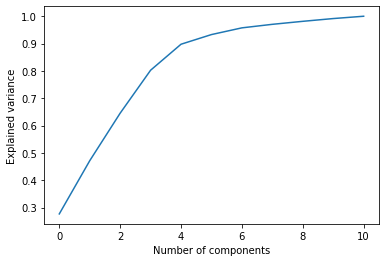

In [165]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

In [166]:
print("Variance explained by the first PC=",np.cumsum(pca.explained_variance_ratio_ *100)[0])
print("Variance explained by the first 2 PC=",np.cumsum(pca.explained_variance_ratio_ *100)[1])
print("Variance explained by the first 3 PC=",np.cumsum(pca.explained_variance_ratio_ *100)[2])
print("Variance explained by the first 6 PC=",np.cumsum(pca.explained_variance_ratio_ *100)[6])

Variance explained by the first PC= 27.679208437298385
Variance explained by the first 2 PC= 47.13981974725431
Variance explained by the first 3 PC= 64.54103399279667
Variance explained by the first 6 PC= 95.7526776331439


In [167]:
 from sklearn.decomposition import PCA
 pca = PCA(n_components=7)
 
 #X_pca_fit = pca.fit_transform(X_train)
 
X_pca_fit = pca.fit_transform(df_arr_scaled[:,:-1])
print("PCA variance ratio=",pca.explained_variance_ratio_, np.sum(pca.explained_variance_ratio_))
 
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7'])
loadings
loadings_arr = np.array(loadings)
print(loadings_arr, loadings_arr.shape)



PCA variance ratio= [0.27679208 0.19460611 0.17401214 0.15711224 0.09512696 0.03530661
 0.02457063] 0.9575267763314391
[[-1.61892692e-02  8.15929057e-02  2.15962164e-02  1.93078126e-02
  -4.58314406e-02  9.73102026e-01 -1.27632489e-01]
 [ 2.59905314e-01  7.14057195e-01 -5.53859260e-01  3.31586950e-01
   2.55468527e-02 -5.18563256e-02 -8.23127388e-04]
 [-2.05595546e-02 -3.98543816e-02  1.28195353e-02 -2.45713506e-02
  -2.79202764e-02 -5.62373267e-02 -1.25704566e-04]
 [ 3.67559637e-01 -6.03897829e-01 -2.09266061e-01  6.72719153e-01
  -1.73047010e-02  4.79827512e-02  1.10232773e-02]
 [ 3.78123362e-02  1.30596768e-02  9.08411199e-03 -2.55914287e-02
   5.09187444e-02  1.57139571e-01  9.50092279e-01]
 [ 1.81199143e-01  3.39130891e-01  7.97470628e-01  4.55303662e-01
  -7.40486497e-02 -5.38846378e-02  1.14283669e-03]
 [ 1.58050595e-02 -1.81486980e-02  1.56396480e-02  1.20209851e-02
   5.25036500e-02 -2.08495825e-02  7.73510502e-02]
 [ 8.79941220e-04  1.63993338e-02 -6.09136817e-03 -6.44622371e

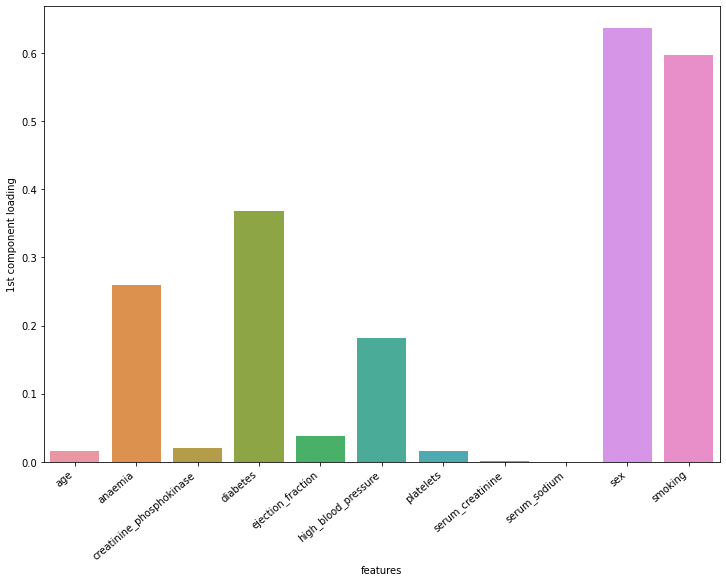

In [168]:
plt.figure(figsize=(10,8))
ax=sns.barplot(x=df_mod_cols[:-1],y=abs(loadings_arr[:,0]))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.xlabel("features")
plt.ylabel("1st component loading")
plt.show()

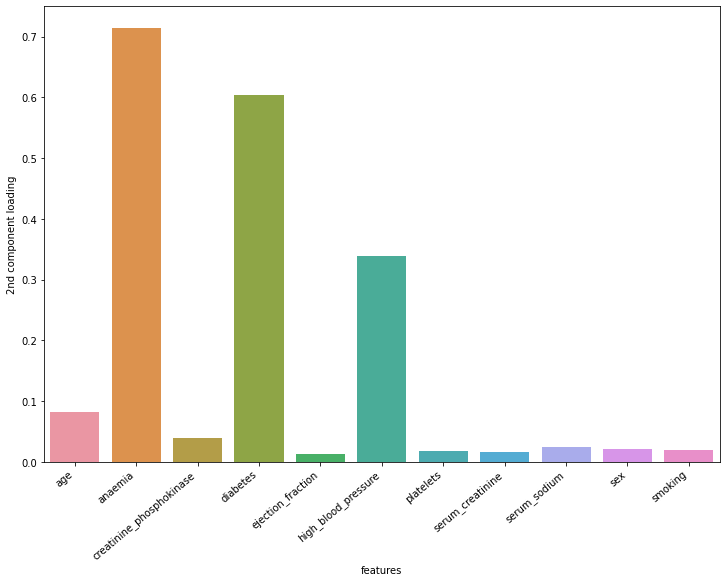

In [169]:
plt.figure(figsize=(10,8))
ax=sns.barplot(x=df_mod_cols[:-1],y=abs(loadings_arr[:,1]))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.xlabel("features")
plt.ylabel("2nd component loading")
plt.show()

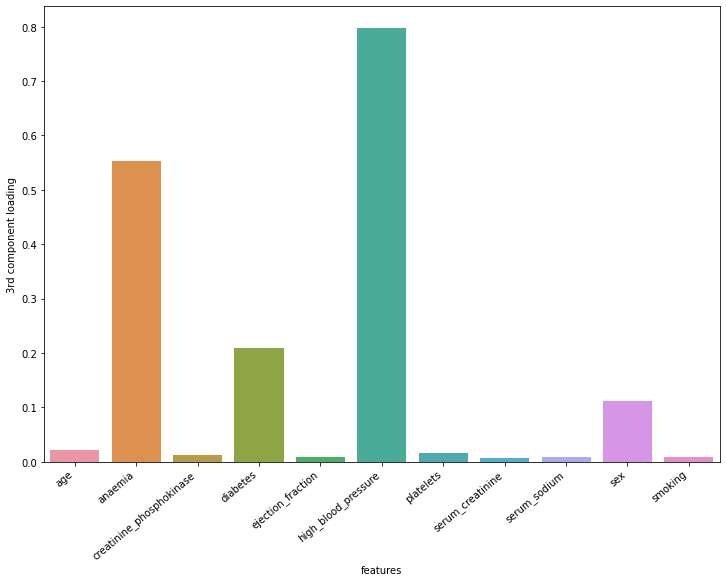

In [170]:
plt.figure(figsize=(10,8))
ax=sns.barplot(x=df_mod_cols[:-1],y=abs(loadings_arr[:,2]))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.xlabel("features")
plt.ylabel("3rd component loading")
plt.show()

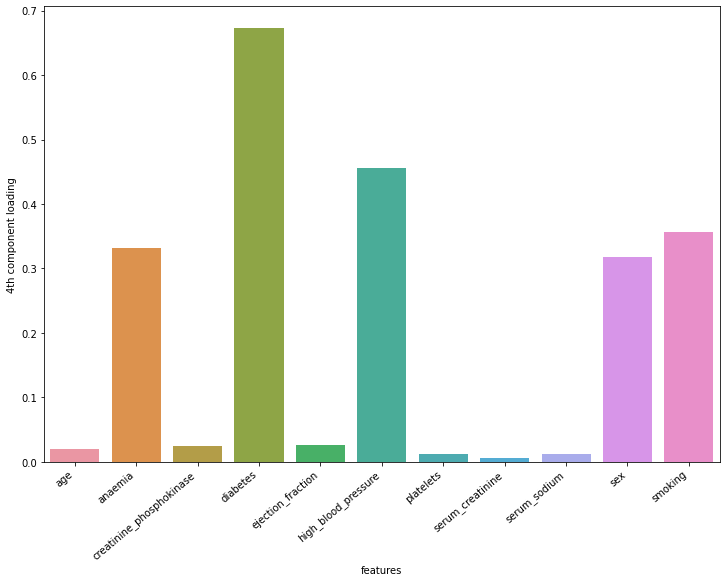

In [171]:
plt.figure(figsize=(10,8))
ax=sns.barplot(x=df_mod_cols[:-1],y=abs(loadings_arr[:,3]))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.xlabel("features")
plt.ylabel("4th component loading")
plt.show()

In [172]:
print(abs( pca.components_ ).shape, abs( pca.components_ ), '\n', '\n', abs( pca.components_ )[1,:])
print('features=',train_columns[:-1])

(7, 11) [[1.61892692e-02 2.59905314e-01 2.05595546e-02 3.67559637e-01
  3.78123362e-02 1.81199143e-01 1.58050595e-02 8.79941220e-04
  2.55557338e-04 6.36686049e-01 5.97312051e-01]
 [8.15929057e-02 7.14057195e-01 3.98543816e-02 6.03897829e-01
  1.30596768e-02 3.39130891e-01 1.81486980e-02 1.63993338e-02
  2.44618515e-02 2.10791471e-02 1.90425376e-02]
 [2.15962164e-02 5.53859260e-01 1.28195353e-02 2.09266061e-01
  9.08411199e-03 7.97470628e-01 1.56396480e-02 6.09136817e-03
  8.22070420e-03 1.11064172e-01 9.51009175e-03]
 [1.93078126e-02 3.31586950e-01 2.45713506e-02 6.72719153e-01
  2.55914287e-02 4.55303662e-01 1.20209851e-02 6.44622371e-03
  1.27605581e-02 3.17460163e-01 3.56982215e-01]
 [4.58314406e-02 2.55468527e-02 2.79202764e-02 1.73047010e-02
  5.09187444e-02 7.40486497e-02 5.25036500e-02 1.31305704e-02
  1.53607090e-02 6.86564019e-01 7.16628755e-01]
 [9.73102026e-01 5.18563256e-02 5.62373267e-02 4.79827512e-02
  1.57139571e-01 5.38846378e-02 2.08495825e-02 1.13963497e-01
  4.7774

In [173]:
type(abs( pca.components_ ))

numpy.ndarray

(299, 7) (299,) (299,)


Text(0, 0.5, 'score-PC2')

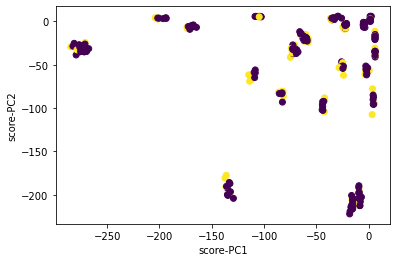

In [174]:
score_PC1 = pca.score_samples(X_pca_fit[:,0].reshape((-1,1)))
score_PC2 = pca.score_samples(X_pca_fit[:,1].reshape((-1,1)))
score_PC3 = pca.score_samples(X_pca_fit[:,2].reshape((-1,1)))
score_PC4 = pca.score_samples(X_pca_fit[:,3].reshape((-1,1)))
score_PC5 = pca.score_samples(X_pca_fit[:,4].reshape((-1,1)))
score_PC6 = pca.score_samples(X_pca_fit[:,5].reshape((-1,1)))
score_PC7 = pca.score_samples(X_pca_fit[:,6].reshape((-1,1)))
print(X_pca_fit.shape, score_PC1.shape, score_PC7.shape)
plt.scatter(score_PC1,score_PC2,c=df_arr_scaled[:,-1])
plt.xlabel("score-PC1")
plt.ylabel("score-PC2")

In [175]:
np.unique(df_arr_scaled[:,-1])

array([0., 1.])

In [176]:
#Lets create a df with the PCA components scores 
df_score = pd.DataFrame(X_pca_fit,columns=['PC1_Score', 'PC2_Score','PC3_Score','PC4_Score','PC5_Score','PC6_Score','PC7_Score'])
df_score['label'] = df_arr_scaled[:,-1]
df_score.describe()

,PC1_Score,PC2_Score,PC3_Score,PC4_Score,PC5_Score,PC6_Score,PC7_Score,label
count,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,2.990000e+02,299.00000
mean,3.564596e-17,1.800863e-17,-1.068610e-17,2.190741e-17,9.282801e-19,5.291197e-18,-1.828712e-17,0.32107
std,6.007532e-01,5.037297e-01,4.763312e-01,4.526102e-01,3.521852e-01,2.145593e-01,1.789895e-01,0.46767
min,-9.817906e-01,-8.357206e-01,-7.666959e-01,-9.265732e-01,-5.698244e-01,-4.279268e-01,-4.646600e-01,0.00000
25%,-5.060992e-01,-2.094461e-01,-4.318323e-01,-2.459416e-01,-4.420365e-01,-1.624739e-01,-1.220958e-01,0.00000
50%,2.818393e-03,-8.529659e-02,1.408509e-03,7.832587e-02,1.906498e-01,-9.398455e-03,-1.395924e-02,0.00000
75%,5.326751e-01,4.950739e-01,2.538026e-01,4.078550e-01,2.532282e-01,1.538116e-01,1.121008e-01,1.00000
max,1.098266e+00,9.445615e-01,9.283928e-01,1.238378e+00,9.604875e-01,5.931216e-01,5.925401e-01,1.00000


In [177]:
#Lets create a df with the PCA components i.e. reduced dimensions
df_new = pd.DataFrame(X_pca_fit,columns=['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7'])
df_new['label'] = df_arr_scaled[:,-1]
df_new.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,label
0,-0.194532,0.179423,0.809117,-0.117958,-0.552328,0.172435,-0.316677,1.0
1,-0.378691,-0.220073,0.020102,-0.611713,-0.469947,-0.155298,0.037305,1.0
2,-0.970996,-0.152822,-0.004280,-0.219125,0.242126,0.064149,-0.318025,1.0
3,-0.108234,0.525759,-0.552198,-0.252328,-0.430651,-0.272641,-0.215833,1.0
4,0.893636,-0.092992,-0.647691,0.116825,0.222984,0.113505,-0.464660,1.0


# PCA output indicates 7 components needed to capture 95% of variance in the input data. Going from 11 to 7 is not a significant reduction in dimension.

# For obtaining list of imported libraries and env settings

In [178]:
!pip freeze


absl-py==0.12.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.1.0
appdirs==1.4.4
argcomplete==1.12.3
argon2-cffi==21.1.0
arviz==0.11.4
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
atari-py==0.2.9
atomicwrites==1.4.0
attrs==21.2.0
audioread==2.1.9
autograd==1.3
Babel==2.9.1
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==4.1.0
blis==0.4.1
bokeh==2.3.3
Bottleneck==1.3.2
branca==0.4.2
bs4==0.0.1
CacheControl==0.12.6
cached-property==1.5.2
cachetools==4.2.4
catalogue==1.0.0
certifi==2021.5.30
cffi==1.14.6
cftime==1.5.1
chardet==3.0.4
charset-normalizer==2.0.6
clang==5.0
click==7.1.2
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.9.5
colorcet==2.0.6
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.3.2
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.2.7
cvxpy==1.0.31
cycler==0.10.0
cymem==2.0.5
Cython==0.29.24
daft==0.0.4
dask==2.12.0
datascience==0.10.6
debugpy==1.0.0
decorator==4.4.2
defusedxml==0.7.1
descartes==1.1.0
dill==0.3.4
distributed=

In [179]:
import types

def imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            yield val.__name__

list(imports())

['builtins',
 'builtins',
 'IPython.core.shadowns',
 'google.colab.drive',
 'os',
 'numpy',
 'pandas',
 'matplotlib.pyplot',
 'seaborn',
 'sklearn',
 'sklearn.ensemble',
 'sklearn.cluster',
 'sklearn.metrics',
 'types']